## **Introduction**

This Data Exploraton Project will focus on the LinkedIn Job Postings Dataset. This dataset contains information on job postings on LinkedIn for the year 2023, covering job details, benefits, skills required, and more. From this datset, I will be using four files:


*   The Job_postings csv
*   The Job_skills csv
*   The Company_industries csv
*   The Skills csv

The purpose of this anaylsis is to answer the following research questions:

*   Which industry offers the highest average salary?
*   What professional skills pays the most?

Through this analysis, I hope to gain insights of the current economy of the job market and how certain professional skills compare to others in financial value.

## **Data Preparation**

We will strat the process by importing the neccasary libriares and files that will be used in this project.

In [1]:
import io
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
df_postings = pd.read_csv('job_postings.csv')
df_skills = pd.read_csv('job_skills.csv')
df_industries = pd.read_csv('company_industries.csv')
df_skills_1 = pd.read_csv("skills.csv")

In [2]:
df_postings

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [3]:
df_skills

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT
...,...,...
27894,3701373522,ADM
27895,3701373523,HCPR
27896,3701373524,OTHR
27897,3701373527,BD


In [4]:
df_skills_1

,skill_abr,skill_name
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning
5,WRT,Writing/Editing
6,QA,Quality Assurance
7,DIST,Distribution
8,PROD,Production
9,PRJM,Project Management


In [5]:
df_industries

,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising
...,...,...
15875,74718032,Food Production
15876,38897,Hospital & Health Care
15877,38897,Hospital & Health Care
15878,2623,Hospital & Health Care


Now, let's merge the files together

In [6]:
df_1 = df_postings.merge(df_skills, how = "left", on="job_id")

In [7]:
df_2= df_1.merge(df_industries, how = "left", on="company_id")

In [8]:
df_final = df_2.merge(df_skills_1,how = "left", on="skill_abr")

In [9]:
df_final

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,skill_abr,industry,skill_name
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,SALE,NaN,Sales
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,BD,NaN,Business Development
2,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,SALE,Transportation/Trucking/Railroad,Sales
3,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,BD,Transportation/Trucking/Railroad,Business Development
4,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,ACCT,Staffing & Recruiting,Accounting/Auditing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463170,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,HCPR,Hospital & Health Care,Health Care Provider
463171,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,HCPR,Hospital & Health Care,Health Care Provider
463172,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,OTHR,Hospital & Health Care,Other
463173,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,NaN,Full-time,"Vicksburg, MS",...,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,BD,Hospital & Health Care,Business Development


Now that we have merged our 3 files, it's time to clean our data so that we can make insights.

## **Data Cleaning**

Due to the nature of our merges, we ended up with a significant amount of duplicate values, so getting rid of them will be our first priority.

In [10]:
df_clean = df_final.drop_duplicates()
df_clean

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,skill_abr,industry,skill_name
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,SALE,NaN,Sales
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,BD,NaN,Business Development
2,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,SALE,Transportation/Trucking/Railroad,Sales
3,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,BD,Transportation/Trucking/Railroad,Business Development
4,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,ACCT,Staffing & Recruiting,Accounting/Auditing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463168,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,ADM,Hospital & Health Care,Administrative
463170,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,HCPR,Hospital & Health Care,Health Care Provider
463172,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,OTHR,Hospital & Health Care,Other
463173,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,NaN,Full-time,"Vicksburg, MS",...,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,BD,Hospital & Health Care,Business Development


Notice that the amount of rows have significantly decreased from 463175 rows to 27604 rows.

The majority of the columns in the dataset are irrelevant to the anaylisi we wish to conduct. Therefore, we have to remove them from the dataframe.

For example, The skills csv was used so that we can have the full name of the abbreviations used in the job_skills csv.

In [11]:
df_clean = df_clean.drop(["description","applies","original_listed_time", "views", "job_posting_url","application_url","application_type","expiry",
               "closed_time", "formatted_experience_level", "listed_time" , "posting_domain", "sponsored",
               "work_type", "remote_allowed", "skills_desc", "compensation_type", "currency", "skill_abr"], axis = 1)

In [12]:
df_clean

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,industry,skill_name
0,85008768,NaN,Licensed Insurance Agent,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,Sales
1,85008768,NaN,Licensed Insurance Agent,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,Business Development
2,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",Transportation/Trucking/Railroad,Sales
3,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",Transportation/Trucking/Railroad,Business Development
4,133196985,1089558.0,Model Risk Auditor,NaN,NaN,NaN,NaN,Contract,"New York, NY",Staffing & Recruiting,Accounting/Auditing
...,...,...,...,...,...,...,...,...,...,...,...
463168,3701373522,38897.0,Unit Secretary,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",Hospital & Health Care,Administrative
463170,3701373523,38897.0,"Radiology Aide, Perdiem",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",Hospital & Health Care,Health Care Provider
463172,3701373524,2623.0,MRI Manager,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",Hospital & Health Care,Other
463173,3701373527,84659.0,Area Director of Business Development,NaN,NaN,NaN,NaN,Full-time,"Vicksburg, MS",Hospital & Health Care,Business Development


There seems to be less entries for median salaries compared to max/min salaries. We can calculate the median salaries by using the max/min salaries columns.

In [13]:
df_clean["med_salary"] = (df_clean["max_salary"] + df_clean["min_salary"]) / 2

There seems to be salaries in three formats: yearly, monthly, and hourly. While we can can convert the hourly and monthly salaries to yearly salaries, the yearly salaries make up the vast majority of the dataset, so we'll just focus on those only.

In [14]:
df_clean = df_clean[df_clean["pay_period"] == "YEARLY"]

In [15]:
df_clean

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,industry,skill_name
0,85008768,NaN,Licensed Insurance Agent,52000.0,48880.0,45760.0,YEARLY,Full-time,"Chico, CA",NaN,Sales
1,85008768,NaN,Licensed Insurance Agent,52000.0,48880.0,45760.0,YEARLY,Full-time,"Chico, CA",NaN,Business Development
10,903408693,3894635.0,Office Associate,42000.0,39500.0,37000.0,YEARLY,Full-time,"Albany, GA",Retail,Administrative
92,2148434033,1082195.0,Contract Bilingual Recruiter,NaN,NaN,NaN,YEARLY,Contract,"Phoenix, AZ",Staffing & Recruiting,Human Resources
264,2148434586,2780388.0,"Manager, Salesforce Platform",170976.0,134808.0,98640.0,YEARLY,Full-time,"New Hampshire, United States",Real Estate,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...
463105,3701373432,2121817.0,Continuous Improvement Specialist,NaN,NaN,NaN,YEARLY,Full-time,"Mississippi, United States",Information Technology & Services,Quality Assurance
463120,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.0,98550.0,91900.0,YEARLY,Full-time,"Torrance, CA","Health, Wellness & Fitness",Marketing
463122,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.0,98550.0,91900.0,YEARLY,Full-time,"Torrance, CA","Health, Wellness & Fitness",Public Relations
463124,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.0,98550.0,91900.0,YEARLY,Full-time,"Torrance, CA","Health, Wellness & Fitness",Writing/Editing


Now that all the entries in the dataset are showing yearly salaries, there's no need for "pay_period" column

In [16]:
df_clean = df_clean.drop(["pay_period"], axis = 1)

In [17]:
df_clean

,job_id,company_id,title,max_salary,med_salary,min_salary,formatted_work_type,location,industry,skill_name
0,85008768,NaN,Licensed Insurance Agent,52000.0,48880.0,45760.0,Full-time,"Chico, CA",NaN,Sales
1,85008768,NaN,Licensed Insurance Agent,52000.0,48880.0,45760.0,Full-time,"Chico, CA",NaN,Business Development
10,903408693,3894635.0,Office Associate,42000.0,39500.0,37000.0,Full-time,"Albany, GA",Retail,Administrative
92,2148434033,1082195.0,Contract Bilingual Recruiter,NaN,NaN,NaN,Contract,"Phoenix, AZ",Staffing & Recruiting,Human Resources
264,2148434586,2780388.0,"Manager, Salesforce Platform",170976.0,134808.0,98640.0,Full-time,"New Hampshire, United States",Real Estate,Information Technology
...,...,...,...,...,...,...,...,...,...,...
463105,3701373432,2121817.0,Continuous Improvement Specialist,NaN,NaN,NaN,Full-time,"Mississippi, United States",Information Technology & Services,Quality Assurance
463120,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.0,98550.0,91900.0,Full-time,"Torrance, CA","Health, Wellness & Fitness",Marketing
463122,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.0,98550.0,91900.0,Full-time,"Torrance, CA","Health, Wellness & Fitness",Public Relations
463124,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.0,98550.0,91900.0,Full-time,"Torrance, CA","Health, Wellness & Fitness",Writing/Editing


Let's make the work_type cloumn name shorter

In [18]:
df_clean = df_clean.rename(columns = {"formatted_work_type":"work_type", "skill_name": "skill"})

It's time to remove all the null values in our dataframe

In [19]:
df_clean = df_clean.dropna()

Now let's check if the dataframe contains anymore null values.

In [20]:
df_clean.isnull().sum()

job_id        0
company_id    0
title         0
max_salary    0
med_salary    0
min_salary    0
work_type     0
location      0
industry      0
skill         0
dtype: int64

Finally, the index of our dataframe does not reflect the number of rows it contains. This needs to be corrected.

In [21]:
df_clean = df_clean.reset_index(drop = True)

Let's take a look at our now clean dataset

In [22]:
df_clean

,job_id,company_id,title,max_salary,med_salary,min_salary,work_type,location,industry,skill
0,903408693,3894635.0,Office Associate,42000.00,39500.00,37000.00,Full-time,"Albany, GA",Retail,Administrative
1,2148434586,2780388.0,"Manager, Salesforce Platform",170976.00,134808.00,98640.00,Full-time,"New Hampshire, United States",Real Estate,Information Technology
2,2148434725,13074.0,Mental Health Professional,79541.00,67410.50,55280.00,Full-time,"Spokane, WA",Hospital & Health Care,Health Care Provider
3,2148434726,13074.0,Mental Health Professional,79541.00,67410.50,55280.00,Full-time,"Spokane, WA",Hospital & Health Care,Health Care Provider
4,2148434909,6600327.0,Clinic Managers - Physical Therapist,117510.65,104260.65,91010.65,Full-time,"Puyallup, WA",Hospital & Health Care,Health Care Provider
...,...,...,...,...,...,...,...,...,...,...
6492,3701373385,18312164.0,Sales Manager,70000.00,65000.00,60000.00,Full-time,"Texas, United States",Computer Software,Marketing
6493,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.00,98550.00,91900.00,Full-time,"Torrance, CA","Health, Wellness & Fitness",Marketing
6494,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.00,98550.00,91900.00,Full-time,"Torrance, CA","Health, Wellness & Fitness",Public Relations
6495,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),105200.00,98550.00,91900.00,Full-time,"Torrance, CA","Health, Wellness & Fitness",Writing/Editing


Now that our dataset is cleaned, we can start our exploraty data analysis.

## **Exploratory Data Analysis (EDA)**

To answer our research question on which indutries pay the most on average and which professional skills pay the most, we will use groupbys to analyze the industry and skills columns.

In [23]:
industry = df_clean.groupby("industry")
salary = industry.med_salary.mean().reset_index()

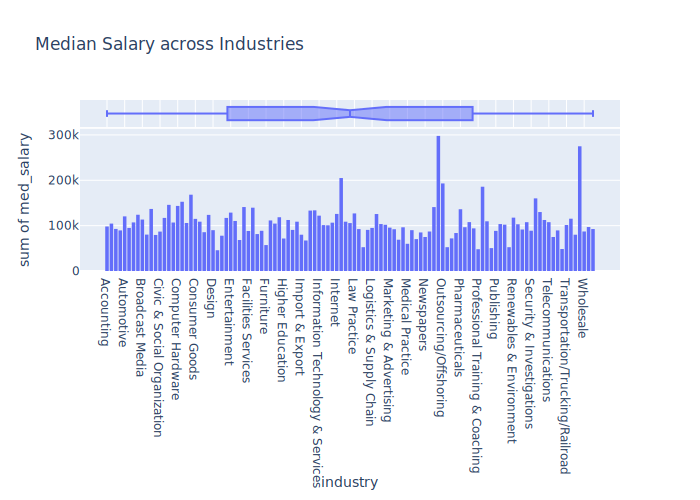

In [24]:
fig = px.histogram(salary, x= 'industry', y = "med_salary", title='Median Salary across Industries', marginal="box", hover_data = ['industry','med_salary'])
fig.show()

* It seems that the Online Media and Veterinary industries offer an extraordinary median salary compared to other industries. Let's take a look at these industries to make sure they are not outliers.

In [25]:
df_clean[df_clean['industry'] == "Veterinary"]

,job_id,company_id,title,max_salary,med_salary,min_salary,work_type,location,industry,skill
27,3657070723,15907041.0,Emergency Veterinarian,350000.0,275000.0,200000.0,Full-time,"Fullerton, CA",Veterinary,Health Care Provider


Just as I thought, it looks like the Veterinary industry was an outlier.

In [26]:
df_clean[df_clean['industry'] == "Online Media"]

,job_id,company_id,title,max_salary,med_salary,min_salary,work_type,location,industry,skill
4079,3699050960,28439179.0,"Manager, Analytics - Underwriting",500000.0,300000.0,100000.0,Full-time,"Culver City, CA",Online Media,Research
4080,3699050960,28439179.0,"Manager, Analytics - Underwriting",500000.0,300000.0,100000.0,Full-time,"Culver City, CA",Online Media,Analyst
4081,3699050960,28439179.0,"Manager, Analytics - Underwriting",500000.0,300000.0,100000.0,Full-time,"Culver City, CA",Online Media,Information Technology
4091,3699053833,28439179.0,"Director, Analytics - Underwriting",500000.0,300000.0,100000.0,Full-time,"Culver City, CA",Online Media,Research
4092,3699053833,28439179.0,"Director, Analytics - Underwriting",500000.0,300000.0,100000.0,Full-time,"Culver City, CA",Online Media,Analyst
4093,3699053833,28439179.0,"Director, Analytics - Underwriting",500000.0,300000.0,100000.0,Full-time,"Culver City, CA",Online Media,Information Technology
4868,3699410307,28439179.0,Recruiting Coordinator,500000.0,285000.0,70000.0,Full-time,"Culver City, CA",Online Media,Human Resources


Just like for the Veterinary industry, it seems that the Online Media industry is also an outlier.

To make our data distribution more even, we'll have to remove those industries from the data

In [27]:
df_clean = df_clean.drop(df_clean[df_clean['industry'] == "Veterinary"].index)
df_clean = df_clean.drop(df_clean[df_clean['industry'] == "Online Media"].index)

Now let's check if the Veterinary industry is still present.

In [28]:
df_clean[df_clean['industry'] == "Veterinary"]

,job_id,company_id,title,max_salary,med_salary,min_salary,work_type,location,industry,skill


Let's do the same for the Online Media industry

In [29]:
df_clean[df_clean['industry'] == "Online Media"]

,job_id,company_id,title,max_salary,med_salary,min_salary,work_type,location,industry,skill


Now that we removed those outliers, let's visualize the the median salaries by industry again.

In [30]:
industry = df_clean.groupby("industry")
salary = industry.med_salary.mean().reset_index()

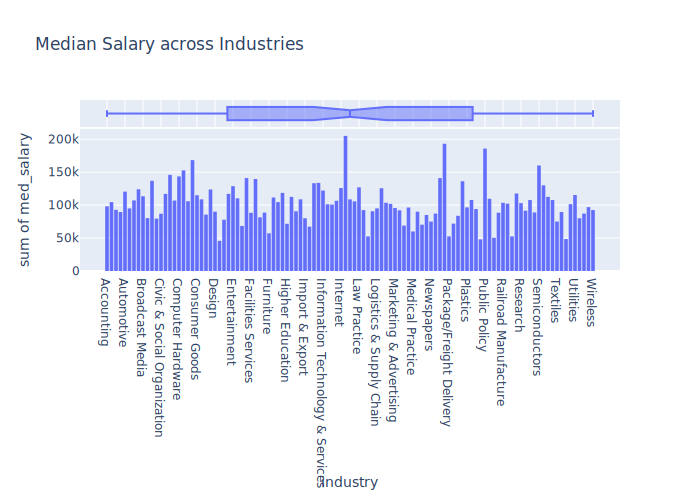

In [31]:
fig = px.histogram(salary, x= 'industry', y = "med_salary", title='Median Salary across Industries', marginal="box", hover_data = ['industry','med_salary'])
fig.show()

 # **Insights:**

*   It seems the highest paying industry in this dataset when looking at their median salary is the Investment Banking industry with an average salary of about $205k.The next 4 top paying industries that follows are Outsourcing/Offshoring (193k), Public Policy (185k), Consumer Electronics(168k), and Semiconductors (160k).

*  I'm a little  suprised by the top 5 highest paying industries. I expected industries such as Consumer Electronics and Banking to by somewhereat the top. Public Policy, Outsourcing/Offshoring, and Semiconductors took me by suprise.

* Judging by the high figures I'm seeing for the median salaries, I'm guessing that the jobs associatted with these skills are more senior more postions rather than entry-level positions.

Now lets do the same thing for skill column.

In [32]:
skills = df_clean.groupby("skill")
salary_2 = skills.med_salary.mean().reset_index()

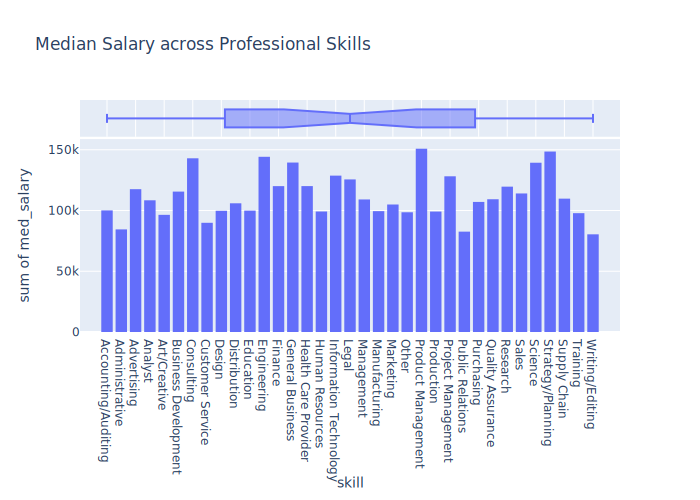

In [33]:
fig = px.histogram(salary_2, x= 'skill', y = "med_salary", title='Median Salary across Professional Skills', marginal="box", hover_data = ['skill','med_salary'])
fig.show()

# **Insights:**

*   It seems the highest paying skill in this dataset when looking at their median salary is Product Management with an average salary of
about $151K.The next 4 top paying skills that follows are Strategy/Planning (149k), Engineering (144k), Consulting(143k), and General Business (139k).

*  I'm mildly suprised by the top 5 highest paying skills. I expected skills such as Product Management and Engineering to by somewhere at the top. Consulting, General Business, and Strategy/Planning took me by suprise. I'm also surprised that a Programming/Technology/Computer skill didn't make the top 5 considering all the conversation on the demand of those type of skills.

* Like for the numbers in the industry visualization, Judging by the high figures I'm seeing for the median salaries, I'm guessing that the jobs associatted with these skills are more senior more postions rather than entry-level positions.


## **Conclusion**

Through my analysis, I was able to answer the research questions:

*   Which industry offers the highest average salary in this dataset? - **Investment Banking, Outsourcing/Offshoring, Public Policy, Consumer Electronics, and Semiconductors**
*   What professional skills pays the most in this data set? - **Product Management, Strategy/Planning, Engineering, Consulting, and General Business**

I feel that that the results of this analysis can be used to see the peak salary of what an individual may make in a certain industry as oppossed to a starting salary which I initially thought the result of this analysis would tell me.